In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [14]:
data = pd.read_csv('data.csv')

In [15]:
data = data.drop(['Unnamed: 32'], axis=1)

In [16]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Check null values

In [18]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [21]:
data['diagnosis'] = data['diagnosis'].replace(['M','B'], [0,1])

# Check distributions

<AxesSubplot:>

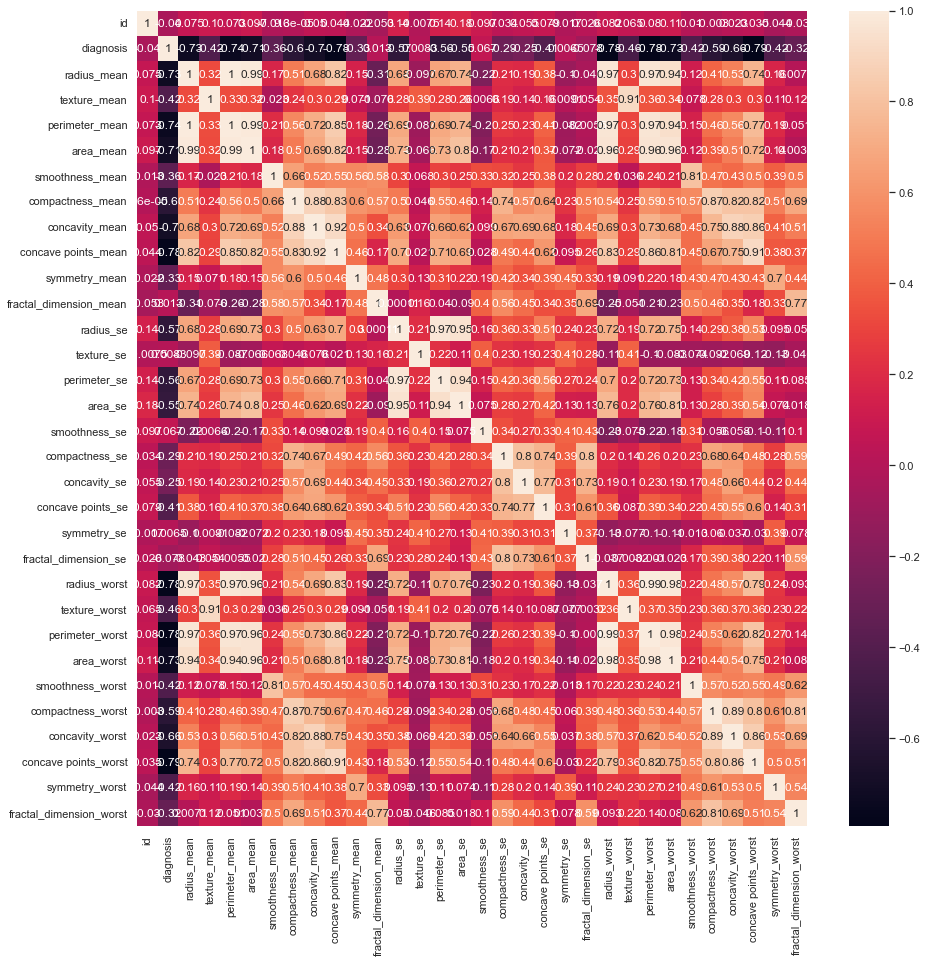

In [22]:
sn.set(rc={'figure.figsize':(15,15)})
sn.heatmap(data.corr(), annot=True)

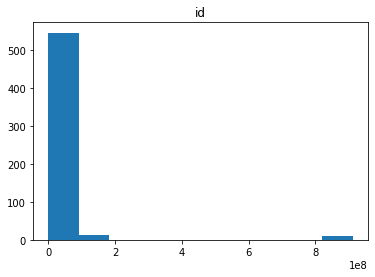

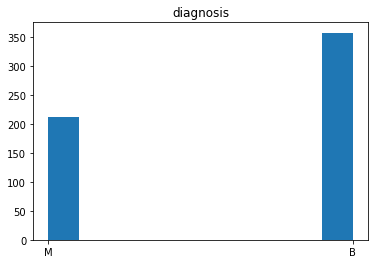

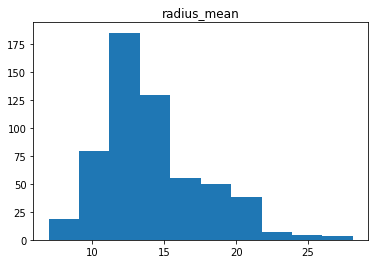

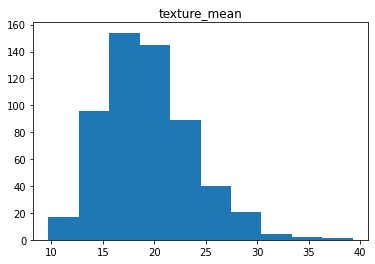

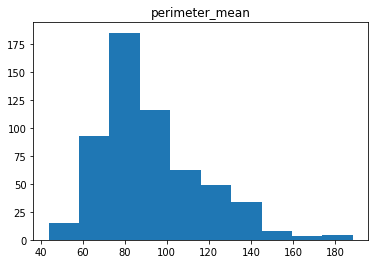

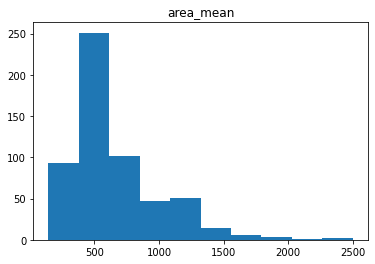

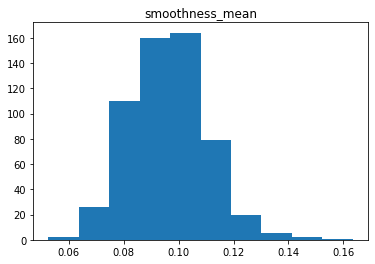

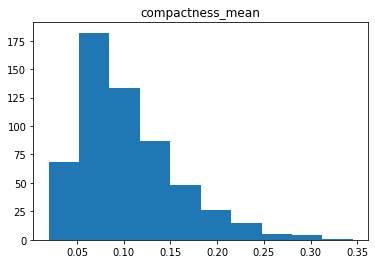

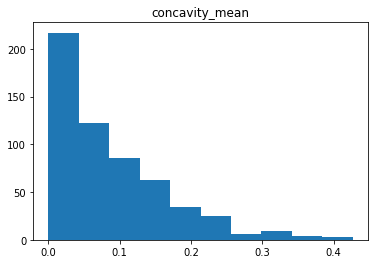

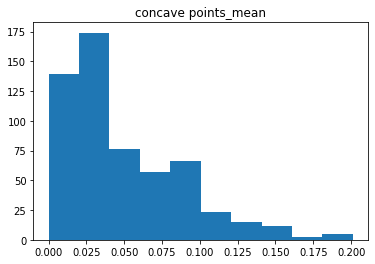

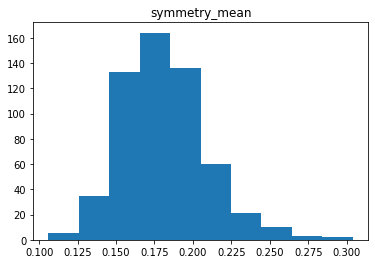

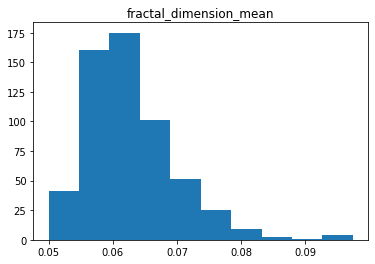

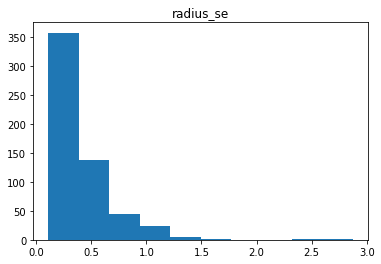

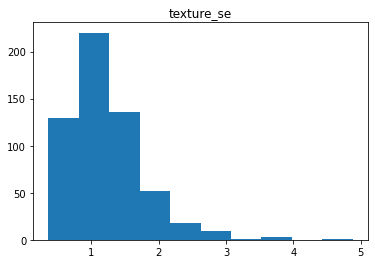

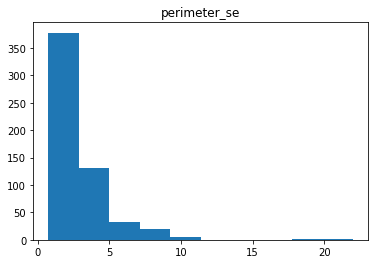

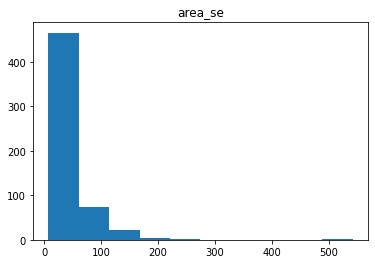

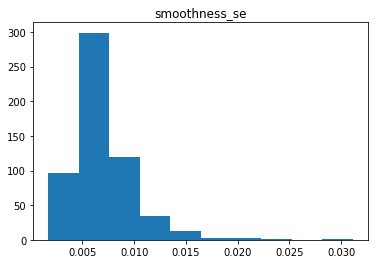

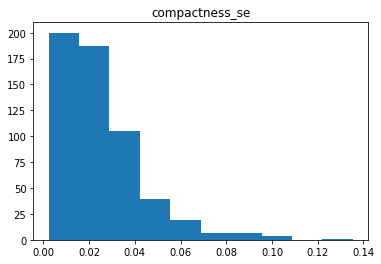

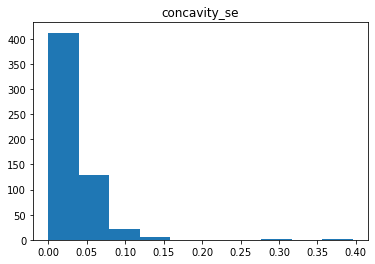

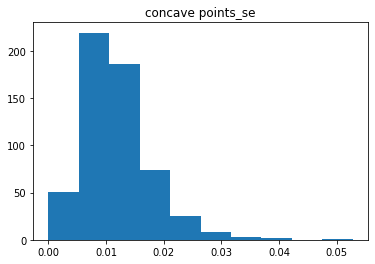

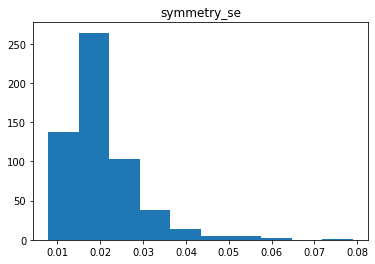

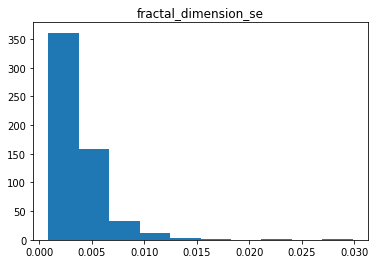

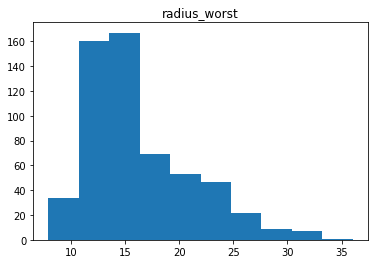

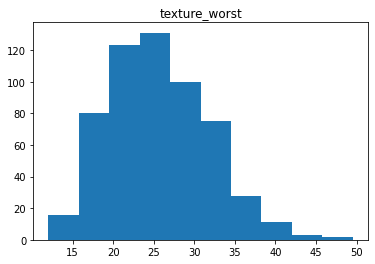

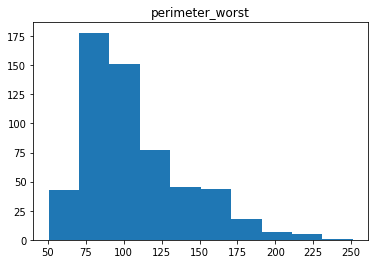

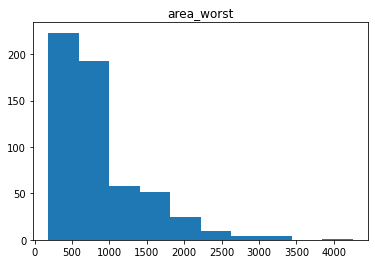

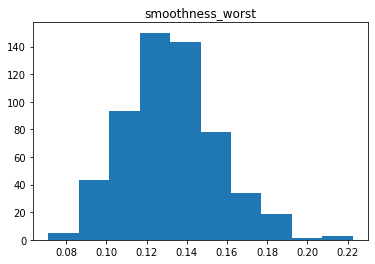

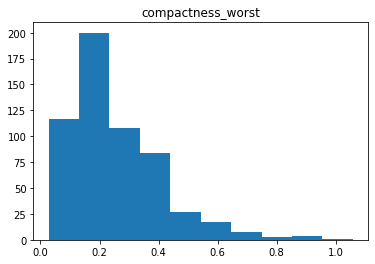

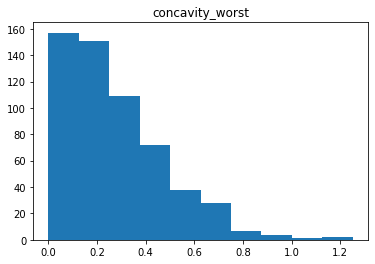

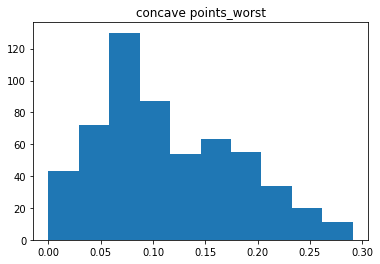

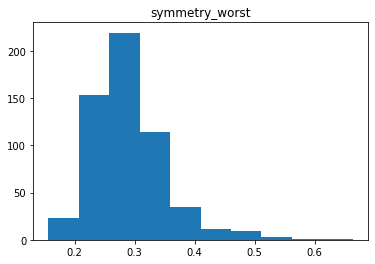

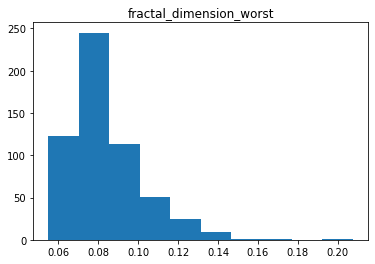

In [8]:
r = data.columns
for i in r:
    plt.title(i)
    plt.hist(data[i])
    plt.show()

In [38]:
data.shape

(569, 32)

In [42]:
X = data.drop(columns=['id','diagnosis'])
y = data['diagnosis']
    
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
reduced_columns = list(featureScores.nlargest(10,'Score').iloc[:,0])

#Reduce columns in X
X = X[reduced_columns]

print(reduced_columns)

['area_worst', 'area_mean', 'area_se', 'perimeter_worst', 'perimeter_mean', 'radius_worst', 'radius_mean', 'perimeter_se', 'texture_worst', 'texture_mean']


In [45]:
reduced_data = pd.concat([X, data['diagnosis']], axis=1)
reduced_data.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean,diagnosis
0,2019.0,1001.0,153.40,184.60,122.80,25.38,17.99,8.589,17.33,10.38,0
1,1956.0,1326.0,74.08,158.80,132.90,24.99,20.57,3.398,23.41,17.77,0
2,1709.0,1203.0,94.03,152.50,130.00,23.57,19.69,4.585,25.53,21.25,0
3,567.7,386.1,27.23,98.87,77.58,14.91,11.42,3.445,26.50,20.38,0
4,1575.0,1297.0,94.44,152.20,135.10,22.54,20.29,5.438,16.67,14.34,0


In [46]:
np.unique(reduced_data['diagnosis'])

array([0, 1])

In [36]:
reduced_data.shape

(569, 10)

<AxesSubplot:>

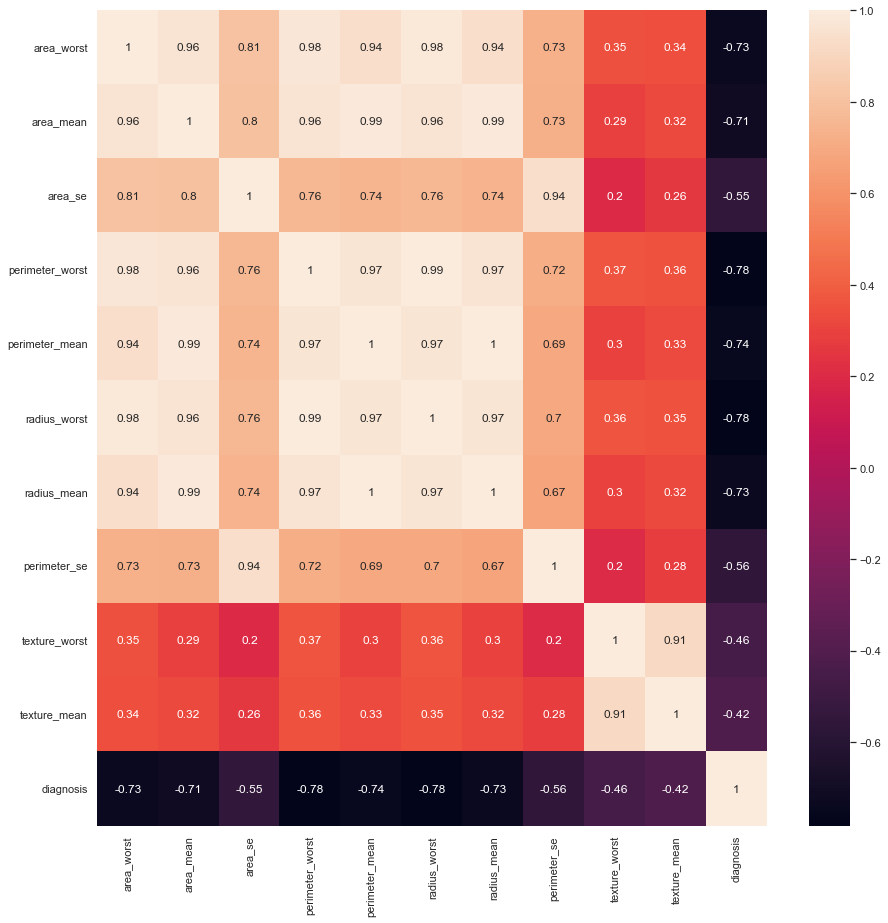

In [47]:
sn.set(rc={'figure.figsize':(15,15)})
sn.heatmap(reduced_data.corr(), annot=True)

# Normalize the data

In [51]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(reduced_data)
standardized_data = pd.DataFrame(standardized_data, columns=reduced_data.columns)

In [52]:
standardized_data.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean,diagnosis
0,2.001237,0.984375,2.487578,2.303601,1.269934,1.886690,1.097064,2.833031,-1.359293,-2.073335,-1.297676
1,1.890489,1.908708,0.742402,1.535126,1.685955,1.805927,1.829821,0.263327,-0.369203,-0.353632,-1.297676
2,1.456285,1.558884,1.181336,1.347475,1.566503,1.511870,1.579888,0.850928,-0.023974,0.456187,-1.297676
3,-0.550021,-0.764464,-0.288378,-0.249939,-0.592687,-0.281464,-0.768909,0.286593,0.133984,0.253732,-1.297676
4,1.220724,1.826229,1.190357,1.338539,1.776573,1.298575,1.750297,1.273189,-1.466770,-1.151816,-1.297676


In [53]:
standardized_data['diagnosis'] = data['diagnosis']
standardized_data.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean,diagnosis
0,2.001237,0.984375,2.487578,2.303601,1.269934,1.886690,1.097064,2.833031,-1.359293,-2.073335,0
1,1.890489,1.908708,0.742402,1.535126,1.685955,1.805927,1.829821,0.263327,-0.369203,-0.353632,0
2,1.456285,1.558884,1.181336,1.347475,1.566503,1.511870,1.579888,0.850928,-0.023974,0.456187,0
3,-0.550021,-0.764464,-0.288378,-0.249939,-0.592687,-0.281464,-0.768909,0.286593,0.133984,0.253732,0
4,1.220724,1.826229,1.190357,1.338539,1.776573,1.298575,1.750297,1.273189,-1.466770,-1.151816,0


# Modeling